In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
#from sklearn.externals import joblib

In [2]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome', ylabel='count'>

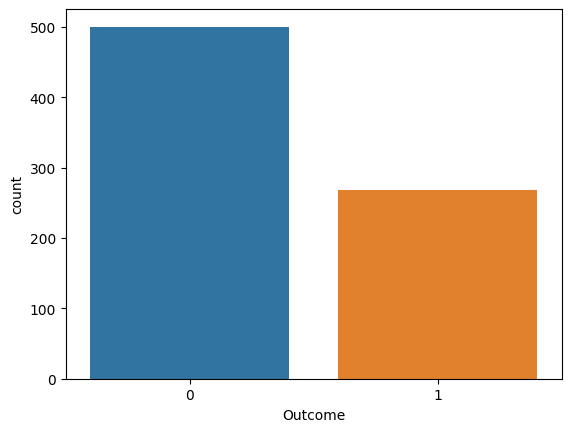

In [3]:
sns.countplot(x='Outcome',data=diabetesDF)

In [4]:
#diabetesDF = diabetesDF.drop('Insulin',axis=1)

In [5]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
columns_to_fill = diabetesDF.columns[1:len(diabetesDF.columns)-1]
diabetesDF[columns_to_fill] = diabetesDF[columns_to_fill].replace(0, pd.NA)
diabetesDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,<NA>,33.6,0.627,50,1
1,1,85,66,29,<NA>,26.6,0.351,31,0
2,8,183,64,<NA>,<NA>,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,<NA>,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,<NA>,<NA>,30.1,0.349,47,1


In [8]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             733 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


In [9]:
diabetesDF[columns_to_fill] = diabetesDF[columns_to_fill].fillna(diabetesDF.mean())
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(
    diabetesDF[diabetesDF.columns[:len(diabetesDF.columns)-1]], diabetesDF[diabetesDF.columns[len(diabetesDF.columns)-1]])
cols = diabetesDF.columns
diabetesDF = pd.DataFrame(X_resampled, columns=cols)
diabetesDF['Outcome'] = y_resampled

diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 70.4 KB


In [11]:
from sklearn import preprocessing
cols = diabetesDF.select_dtypes(np.number).columns[:len(diabetesDF.columns)-1]
scaler = preprocessing.Normalizer().fit(diabetesDF[cols])
diabetesDF[cols] = scaler.transform(diabetesDF[cols])
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.017919,0.566957,0.338102,0.136898,0.671737,0.153233,0.002273,0.155589,0.50000
std,0.014964,0.108627,0.087504,0.046602,0.140868,0.043773,0.001584,0.051885,0.50025
min,0.000000,0.199761,0.068827,0.019045,0.064709,0.034528,0.000250,0.032460,0.00000
25%,0.005679,0.499557,0.293443,0.112972,0.609946,0.126480,0.001163,0.116717,0.00000
50%,0.014744,0.569812,0.333978,0.132660,0.696270,0.148034,0.001839,0.151087,0.50000
75%,0.026856,0.648374,0.377209,0.151880,0.757237,0.174820,0.002977,0.188536,1.00000
max,0.081972,0.860470,0.708886,0.381308,0.970458,0.355682,0.011185,0.430303,1.00000


In [12]:
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.025315,0.624447,0.303785,0.147673,0.656295,0.141766,0.002645,0.210962,1
1,0.005111,0.434404,0.337302,0.148208,0.794950,0.135943,0.001794,0.158430,0
2,0.031558,0.721898,0.252467,0.115004,0.613606,0.091914,0.002651,0.126233,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655,1


In [13]:
diabetesDF.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.005538,0.142424,0.087666,-0.071810,0.022758,-0.038779,0.515467,0.092149
Glucose,0.005538,1.000000,0.352980,0.210903,-0.816701,0.341917,0.204375,0.214492,0.100160
BloodPressure,0.142424,0.352980,1.000000,0.457727,-0.710453,0.627199,0.221583,0.455968,-0.303236
SkinThickness,0.087666,0.210903,0.457727,1.000000,-0.461867,0.695539,0.227083,0.252990,-0.107919
Insulin,-0.071810,-0.816701,-0.710453,-0.461867,1.000000,-0.610798,-0.301152,-0.399621,0.103847
BMI,0.022758,0.341917,0.627199,0.695539,-0.610798,1.000000,0.315106,0.259258,-0.134600
DiabetesPedigreeFunction,-0.038779,0.204375,0.221583,0.227083,-0.301152,0.315106,1.000000,0.120454,0.031923
Age,0.515467,0.214492,0.455968,0.252990,-0.399621,0.259258,0.120454,1.000000,-0.053604
Outcome,0.092149,0.100160,-0.303236,-0.107919,0.103847,-0.134600,0.031923,-0.053604,1.000000


<Axes: >

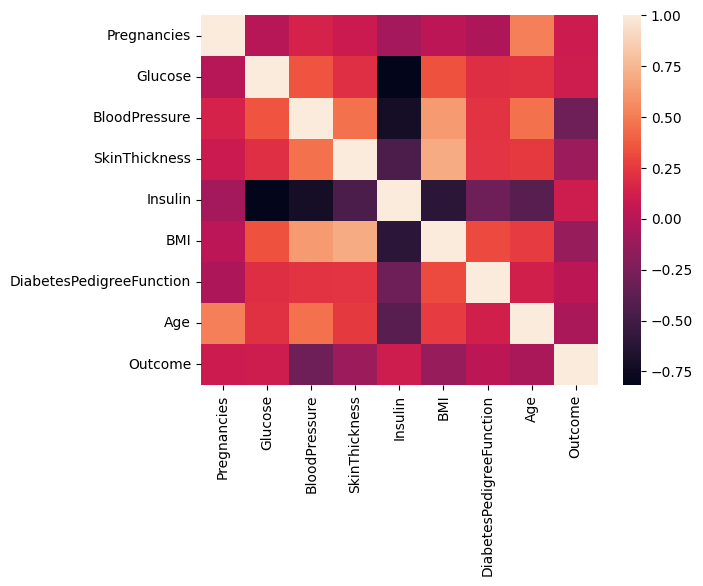

In [14]:
sns.heatmap(diabetesDF.corr())

<Axes: xlabel='Outcome', ylabel='count'>

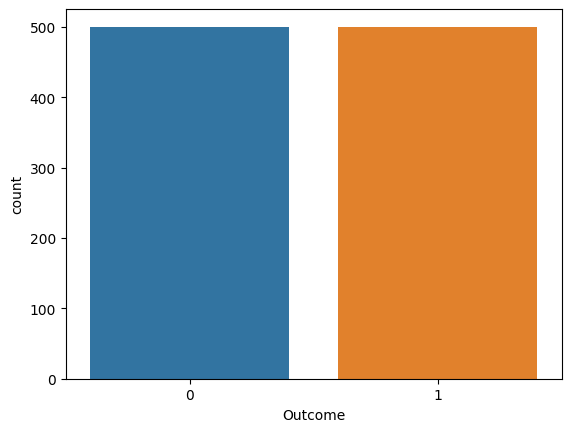

In [15]:
sns.countplot(x='Outcome',data=diabetesDF)

In [16]:
from sklearn.decomposition import PCA
labels_column = 'Outcome'
labels = diabetesDF['Outcome']
pca = PCA(n_components=2)
principal_components = pca.fit_transform(diabetesDF)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
diabetesDF = pd.DataFrame(data=principal_components, columns=pca_columns)
diabetesDF[labels_column] = labels

diabetesDF.describe()

[0.8477813  0.11321669]


,PC1,PC2,Outcome
count,1000.000000,1.000000e+03,1000.00000
mean,0.000000,7.505108e-17,0.50000
std,0.501414,1.832354e-01,0.50025
min,-0.519800,-5.199221e-01,0.00000
25%,-0.500805,-1.117514e-01,0.00000
50%,0.004095,-1.313249e-02,0.50000
75%,0.499140,1.039576e-01,1.00000
max,0.535079,6.523978e-01,1.00000


<Axes: >

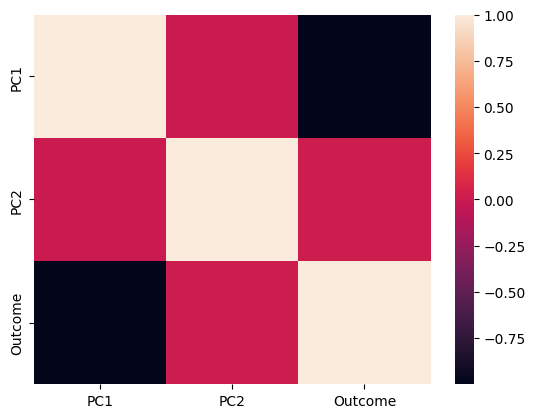

In [17]:
sns.heatmap(diabetesDF.corr())

In [18]:
x = diabetesDF.drop('Outcome',axis=1)
y = diabetesDF['Outcome']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

par_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'] 
}
grid_search = GridSearchCV(model, par_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)
best_par = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
predictions = best_model.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       147

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [23]:
cnf_matrix = confusion_matrix(y_test,predictions)

In [24]:
cnf_matrix

array([[153,   0],
       [  0, 147]])

In [25]:
accuracy = (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[1][0] + cnf_matrix[0][1])

In [26]:
print(accuracy*100)

100.0


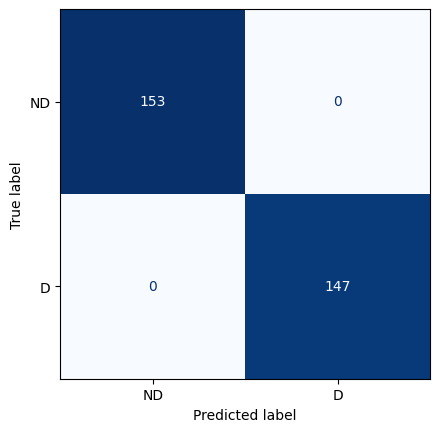

In [27]:
matrix_viz = ConfusionMatrixDisplay(cnf_matrix, display_labels = ["ND","D"])
matrix_viz.plot(colorbar=False,cmap='Blues')

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)

par_grid = {
    'n_estimators':[50,100,200,500],
    'max_depth':[None,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, par_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)
best_par = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
predictions = best_model.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       147

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



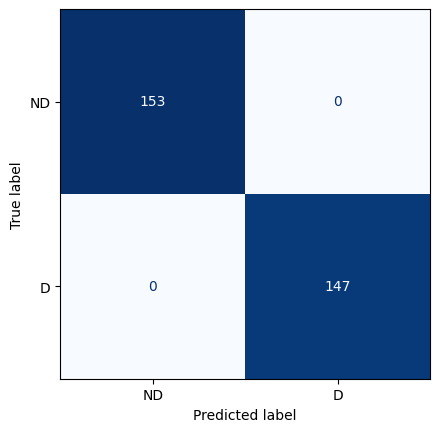

In [29]:
cnf_matrix = confusion_matrix(y_test,predictions)
matrix_viz = ConfusionMatrixDisplay(cnf_matrix, display_labels = ["ND","D"])
matrix_viz.plot(colorbar=False,cmap='Blues')

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model = SVC()

par_grid = {
    'C':[0.1, 1, 10, 100],
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma': ['scale','auto'],
    'degree': [2,3,4] # For poly kernel
}
grid_search = GridSearchCV(model, par_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)
best_par = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
predictions = best_model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       147

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



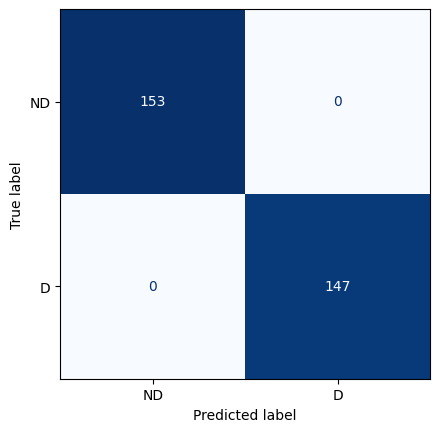

In [31]:
cnf_matrix = confusion_matrix(y_test,predictions)
matrix_viz = ConfusionMatrixDisplay(cnf_matrix, display_labels = ["ND","D"])
matrix_viz.plot(colorbar=False,cmap='Blues')